In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('/content/goldfish.jpg')

array([[[71, 83, 17],
        [73, 86, 17],
        [76, 89, 20],
        ...,
        [81, 96,  1],
        [80, 95,  0],
        [79, 94,  0]],

       [[70, 82, 16],
        [72, 84, 18],
        [76, 89, 20],
        ...,
        [81, 96,  1],
        [79, 94,  0],
        [79, 94,  1]],

       [[69, 81, 15],
        [72, 84, 18],
        [77, 90, 21],
        ...,
        [80, 95,  0],
        [78, 93,  0],
        [77, 92,  0]],

       ...,

       [[16, 33,  1],
        [15, 34,  2],
        [16, 35,  3],
        ...,
        [33, 51, 11],
        [33, 51, 11],
        [33, 51,  9]],

       [[16, 35,  3],
        [17, 36,  4],
        [18, 37,  5],
        ...,
        [30, 48, 10],
        [30, 48, 10],
        [30, 48, 10]],

       [[18, 38,  3],
        [19, 39,  4],
        [19, 41,  5],
        ...,
        [28, 45,  9],
        [28, 46,  8],
        [28, 46,  8]]], dtype=uint8)
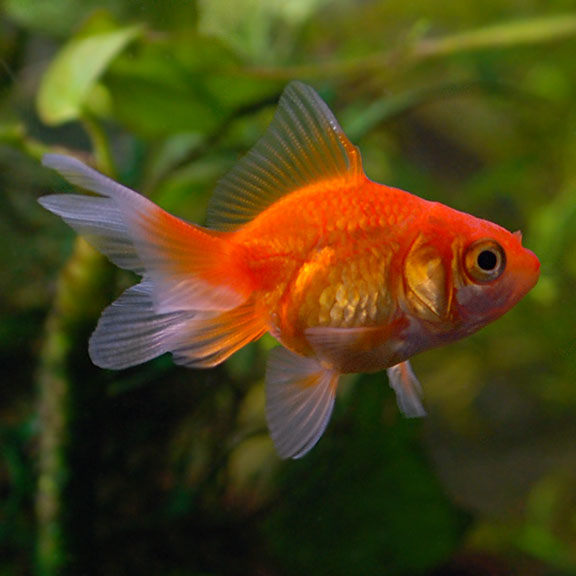

In [ ]:
img

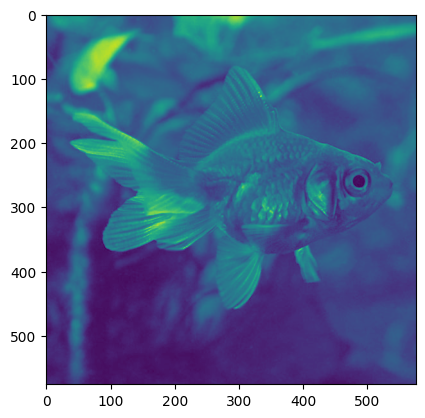

In [ ]:
gr_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

plt.imshow(gr_img)

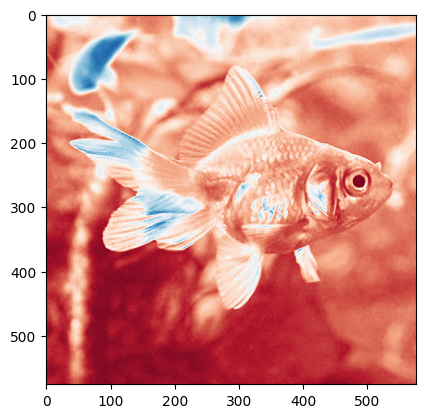

In [ ]:
plt.imshow(gr_img , cmap = 'RdBu')

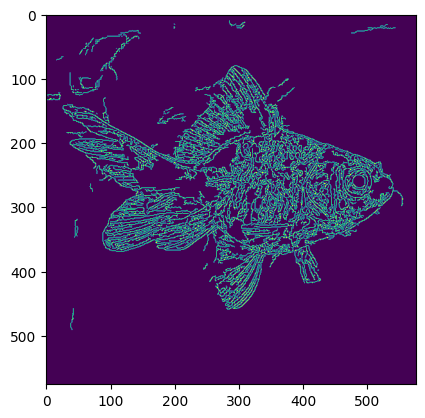

In [ ]:
gr_img = cv2.convertScaleAbs(gr_img)
edge = cv2.Canny(gr_img , 10 , 70)
plt.imshow(edge)

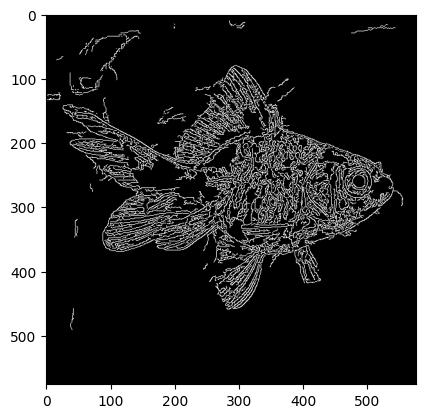

In [ ]:
plt.imshow(edge , cmap = 'gray')

In [ ]:
orb = cv2.ORB_create()
key = orb.detect(gr_img , None)

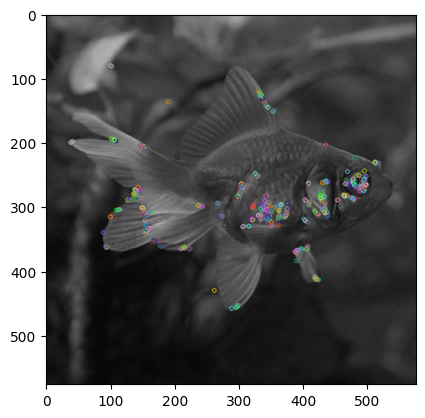

In [ ]:
keypoints , descriptors = orb.compute(gr_img , key)
keypoints_img = cv2.drawKeypoints(gr_img , keypoints , None)
plt.imshow(keypoints_img)

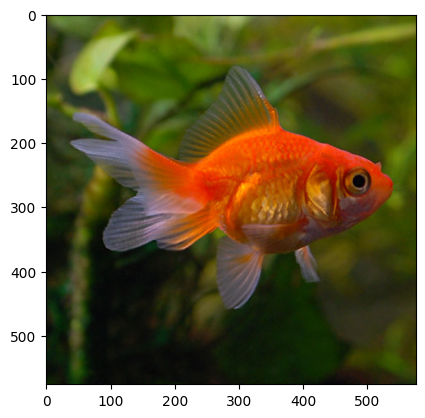

In [ ]:
rst , thrash =  cv2.threshold(gr_img , 200 , 255, 0)

contours , hir = cv2.findContours(thrash  , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont_img = cv2.drawContours(img.copy(), contours , -1, (0,255, 0), 3)
plt.imshow(cont_img)

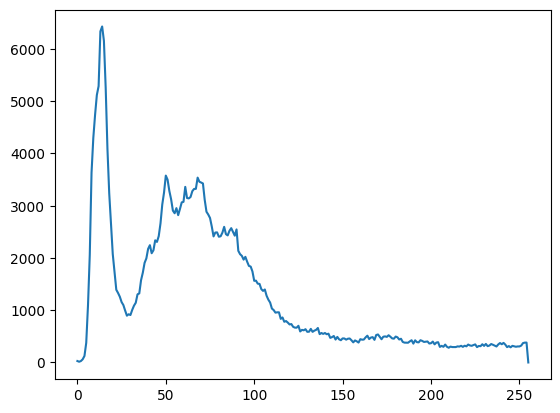

In [ ]:
hist = cv2.calcHist([img], [0], None, [256], [0,255])
plt.plot(hist)

In [2]:
#pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 20.7 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
model = YOLO('yolov10n.pt')
#In this way we use models

100%|██████████| 5.59M/5.59M [00:00<00:00, 17.8MB/s]


In [ ]:
res = model.predict('/content/detect(1).jpg' , save = True)


image 1/1 /content/detect(1).jpg: 384x640 5 persons, 2 bicycles, 1 car, 2 buss, 1 traffic light, 353.1ms
Speed: 5.3ms preprocess, 353.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


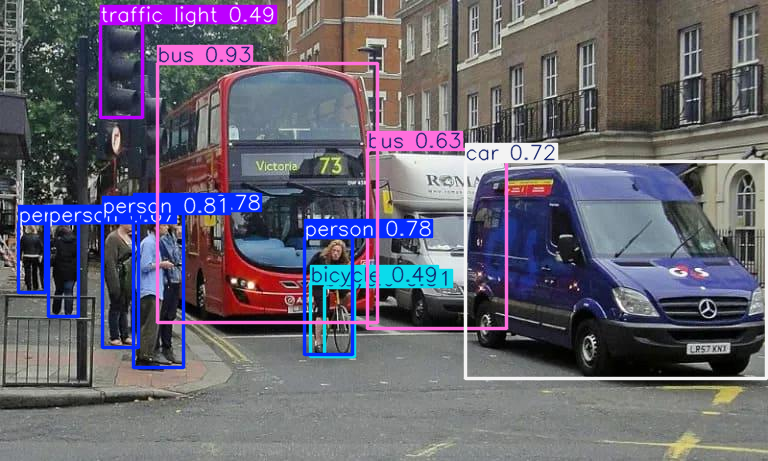

In [ ]:
annoted_image = res[0].plot()
cv2_imshow(annoted_image)

In [ ]:
#We are gonna train it now

In [2]:
# collection of required data
# annotate a dataset - robo flow
# organizing data from yolo
# create custome data.yaml file:
# implementation
# prediction part

In [5]:
# pip install labelImg

In [3]:
#RoboFlow for live tracking

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PhoZrk5D83YVYOA9AnC9")
project = rf.workspace("testing-qu1kc").project("yolo-bike-identification-project")
version = project.version(4)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolo-bike-identification-project-4 in yolov9:: 100%|██████████| 500/500 [00:00<00:00, 5936.65it/s]


In [7]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 94.1MB/s]


In [8]:
model.train(data = '/content/yolo-bike-identification-project-4/data.yaml', epochs = 50 , batch= 20 , imgsz =640)

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/yolo-bike-identification-project-4/data.yaml, epochs=50, time=None, patience=100, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

100%|██████████| 755k/755k [00:00<00:00, 24.8MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo-bike-identification-project-4/train/labels... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<00:00, 1843.19it/s]

train: New cache created: /content/yolo-bike-identification-project-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/yolo-bike-identification-project-4/valid/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 1412.82it/s]

val: New cache created: /content/yolo-bike-identification-project-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.68G      1.385      3.743      1.613         17        640: 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all         44         50     0.0998       0.92      0.405       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.6G       1.14      2.803      1.449         31        640: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         44         50     0.0988       0.96      0.677      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.61G      1.098      2.077      1.445         18        640: 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         44         50      0.176       0.96       0.62      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.6G      1.104      1.837      1.403         28        640: 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         44         50      0.191       0.96      0.782      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.62G       1.02      1.762      1.381         24        640: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         44         50      0.972       0.38      0.751      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.6G     0.9569      1.625      1.322         30        640: 100%|██████████| 9/9 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         44         50       0.88      0.586      0.781      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.62G      1.001      1.575      1.339         28        640: 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         44         50      0.767       0.66      0.707      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.64G      1.031      1.514      1.398         21        640: 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         44         50      0.773       0.66      0.757      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.62G      1.085      1.584      1.397         21        640: 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         44         50      0.866       0.82      0.838       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.61G      1.093      1.571      1.423         27        640: 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         44         50      0.722       0.76      0.764      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.62G      1.022      1.567      1.373         18        640: 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         44         50      0.661      0.508      0.601       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.61G     0.9304      1.413      1.289         23        640: 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         44         50      0.623      0.396      0.416       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.63G     0.9709      1.401      1.311         28        640: 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         44         50      0.937      0.594      0.675      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.63G     0.9934      1.433      1.351         25        640: 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         44         50      0.715       0.56      0.564      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.61G      1.016      1.413      1.339         25        640: 100%|██████████| 9/9 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         44         50      0.841       0.68      0.793      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.62G       1.01      1.286      1.344         38        640: 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         44         50      0.853      0.695      0.723      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.63G     0.9299      1.272      1.279         25        640: 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         44         50      0.874      0.695      0.821       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.61G     0.8967      1.227      1.266         21        640: 100%|██████████| 9/9 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         44         50      0.713       0.54      0.604      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.61G     0.9106      1.205      1.264         21        640: 100%|██████████| 9/9 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         44         50      0.732       0.66      0.708      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.62G     0.8942      1.239       1.27         25        640: 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         44         50      0.762       0.72      0.793      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.61G     0.8197      1.145       1.21         28        640: 100%|██████████| 9/9 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         44         50      0.849       0.72      0.792      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.64G     0.8099      1.103      1.201         27        640: 100%|██████████| 9/9 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         44         50      0.884       0.66      0.744      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.61G     0.9116      1.168      1.277         23        640: 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]


                   all         44         50       0.83      0.585      0.738      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.65G     0.8432       1.14       1.22         19        640: 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         44         50      0.865        0.6      0.661      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.61G     0.8559       1.07      1.244         26        640: 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         44         50       0.77       0.68      0.726      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.61G     0.8111     0.9705      1.177         21        640: 100%|██████████| 9/9 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         44         50      0.697       0.76      0.777      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.64G     0.8147     0.9672      1.191         26        640: 100%|██████████| 9/9 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         44         50      0.819       0.76      0.794      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.61G     0.7565     0.9523      1.173         25        640: 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         44         50      0.863        0.8      0.807        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.61G     0.7653     0.9312      1.173         19        640: 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         44         50      0.852       0.74      0.805      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.62G     0.7176     0.8944      1.134         21        640: 100%|██████████| 9/9 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         44         50      0.828       0.84       0.86      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.62G     0.7258     0.9015      1.155         24        640: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         44         50      0.902       0.76      0.807      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.63G      0.708     0.8963      1.141         24        640: 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         44         50      0.901       0.76      0.811      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.61G     0.6933     0.8816      1.117         26        640: 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         44         50      0.906        0.8      0.858      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.61G     0.6757     0.8373       1.11         34        640: 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         44         50       0.95        0.8      0.795      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.63G     0.7085     0.8907      1.149         21        640: 100%|██████████| 9/9 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         44         50      0.945       0.74      0.838      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.64G     0.6818     0.8654      1.096         29        640: 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         44         50      0.969       0.84      0.897      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.61G     0.6731     0.8697      1.119         25        640: 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         44         50      0.942        0.8      0.832      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.62G     0.6524     0.8373      1.111         31        640: 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         44         50        0.9        0.8      0.815      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.61G     0.6574     0.8466      1.106         29        640: 100%|██████████| 9/9 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         44         50      0.944       0.84      0.876       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.63G     0.6159     0.7554      1.073         19        640: 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         44         50      0.912       0.88      0.867      0.551


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.61G     0.5767     0.9768      1.063         15        640: 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         44         50      0.911       0.82       0.87      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.62G     0.5009     0.8864      1.046         11        640: 100%|██████████| 9/9 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         44         50      0.911      0.819      0.856      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.61G     0.5175     0.8643      1.024         14        640: 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         44         50      0.867      0.779      0.799      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.62G     0.5037     0.8434      1.031         12        640: 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         44         50      0.934        0.8       0.87      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.62G     0.4831     0.7989      1.015         11        640: 100%|██████████| 9/9 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         44         50       0.94       0.76      0.824      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.62G     0.4495     0.7711      1.007         12        640: 100%|██████████| 9/9 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         44         50      0.941       0.76      0.836      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.62G     0.4349     0.7404     0.9698         13        640: 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         44         50      0.936       0.76      0.821      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.61G     0.4305     0.7413     0.9822         10        640: 100%|██████████| 9/9 [00:02<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         44         50       0.93       0.76      0.822      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.62G     0.4134     0.7248     0.9477         10        640: 100%|██████████| 9/9 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         44         50      0.927       0.76      0.808      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.62G     0.4163     0.7157      0.985         11        640: 100%|██████████| 9/9 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         44         50      0.929       0.76      0.814      0.606



50 epochs completed in 0.066 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]


                   all         44         50      0.929       0.76      0.814      0.604
               Bicycle         44         50      0.929       0.76      0.814      0.604
Speed: 0.4ms preprocess, 2.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f46ef0ce2f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
model.val()

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/yolo-bike-identification-project-4/valid/labels.cache... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]


                   all         44         50      0.929       0.76      0.814      0.606
               Bicycle         44         50      0.929       0.76      0.814      0.606
Speed: 0.3ms preprocess, 18.5ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f46f0cd77c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:
resofone = model.predict('/content/yolo-bike-identification-project-4/test/images/20220815_19_17_35_502_000_nNovHPpHmHgQvkzfItJqA00AOFC2_T_4160_3120-1-_jpg.rf.e3312f581006f566ea554547ab1070ea.jpg')


image 1/1 /content/yolo-bike-identification-project-4/test/images/20220815_19_17_35_502_000_nNovHPpHmHgQvkzfItJqA00AOFC2_T_4160_3120-1-_jpg.rf.e3312f581006f566ea554547ab1070ea.jpg: 640x640 2 Bicycles, 9.8ms
Speed: 3.3ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [13]:
resofone

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bicycle', 1: 'blanket', 2: 'chair', 3: 'head', 4: 'seat', 5: 'wheel'}
 obb: None
 orig_img: array([[[190, 194, 199],
         [190, 194, 199],
         [189, 193, 198],
         ...,
         [ 22,  34,  88],
         [ 21,  34,  86],
         [ 24,  37,  89]],
 
        [[190, 194, 199],
         [189, 193, 198],
         [189, 193, 198],
         ...,
         [ 23,  35,  89],
         [ 20,  33,  85],
         [ 21,  34,  86]],
 
        [[189, 193, 198],
         [189, 193, 198],
         [189, 193, 198],
         ...,
         [ 23,  35,  89],
         [ 21,  34,  86],
         [ 22,  35,  87]],
 
        ...,
 
        [[ 89, 105, 117],
         [ 82,  98, 110],
         [109, 125, 138],
         ...,
         [ 13,  15,  23],
         [ 13,  15,  23],
         [ 14,  16,  24]],
 
        [[ 79,  95, 107],
         [112, 128, 140

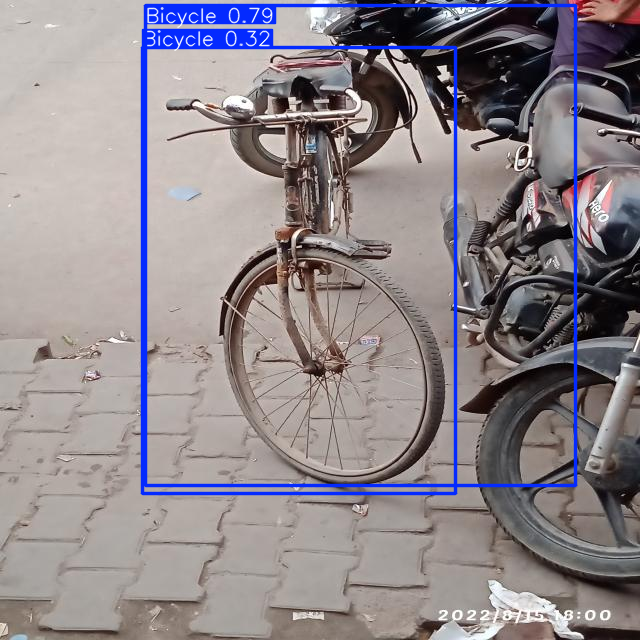

In [12]:
annoted_image = resofone[0].plot()
cv2_imshow(annoted_image)

In [16]:
res2 = model.predict('/content/yolo-bike-identification-project-4/test/images/20220820_14_53_10_731_000_HrX9jCT6CQVlTYNJahspmiOMcVi2_F_3264_2448_jpg.rf.22d03957a6bea3af13ce61a5fdd16232.jpg')


image 1/1 /content/yolo-bike-identification-project-4/test/images/20220820_14_53_10_731_000_HrX9jCT6CQVlTYNJahspmiOMcVi2_F_3264_2448_jpg.rf.22d03957a6bea3af13ce61a5fdd16232.jpg: 640x640 1 Bicycle, 10.0ms
Speed: 2.4ms preprocess, 10.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


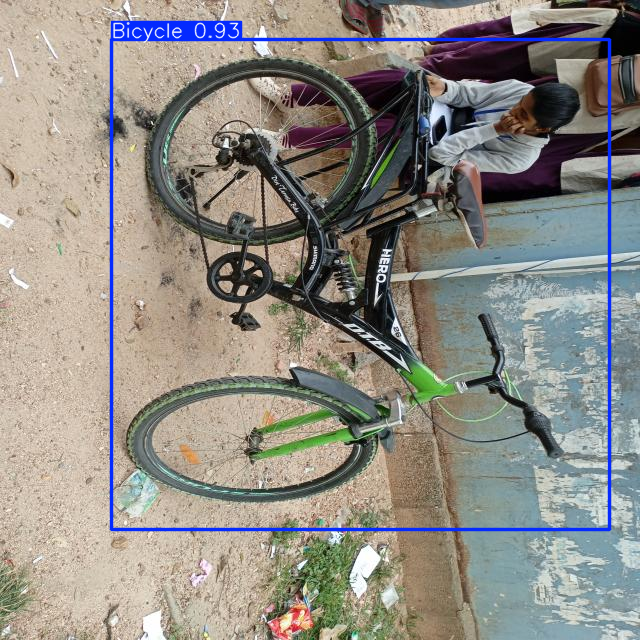

In [17]:
annoted_image = res2[0].plot()
cv2_imshow(annoted_image)

In [18]:
yolotest = YOLO('yolov8n.pt')
resyolo = yolotest.predict(source = '/content/yolo-bike-identification-project-4/test/images/20220820_14_53_10_731_000_HrX9jCT6CQVlTYNJahspmiOMcVi2_F_3264_2448_jpg.rf.22d03957a6bea3af13ce61a5fdd16232.jpg')


image 1/1 /content/yolo-bike-identification-project-4/test/images/20220820_14_53_10_731_000_HrX9jCT6CQVlTYNJahspmiOMcVi2_F_3264_2448_jpg.rf.22d03957a6bea3af13ce61a5fdd16232.jpg: 640x640 1 person, 1 clock, 17.1ms
Speed: 2.4ms preprocess, 17.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


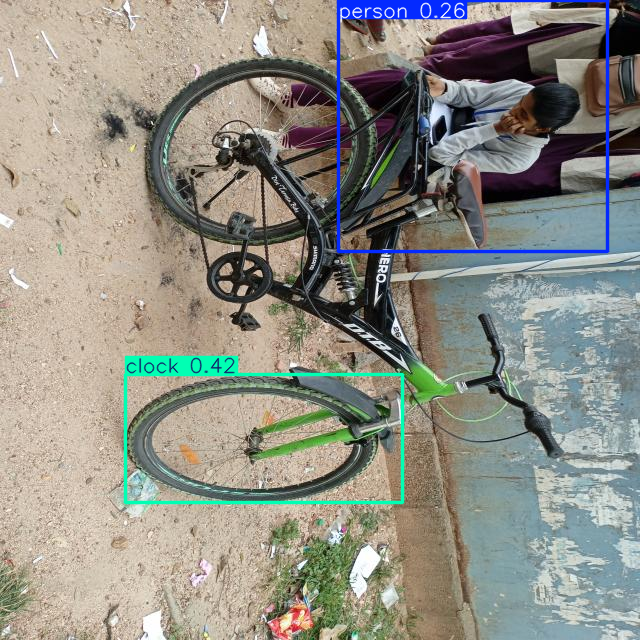

In [19]:
annoted_yolo = resyolo[0].plot()
cv2_imshow(annoted_yolo)